In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
session=cc.database.create_session()

In [3]:
client = Client()
client

2022-03-29 20:29:26,639 - distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-d4d_wrgu', purging
2022-03-29 20:29:26,640 - distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-v31eg0l1', purging
2022-03-29 20:29:26,641 - distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-o8c9l9hd', purging
2022-03-29 20:29:26,642 - distributed.diskutils - INFO - Found stale lock file and directory '/local/v45/amh157/tmp/dask-worker-space/worker-u7gsf3q0', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 44.92 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40241,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 44.92 GiB
Comm: tcp://127.0.0.1:35173,Total threads: 4
Dashboard: /proxy/40067/status,Memory: 11.23 GiB
Nanny: tcp://127.0.0.1:33557,


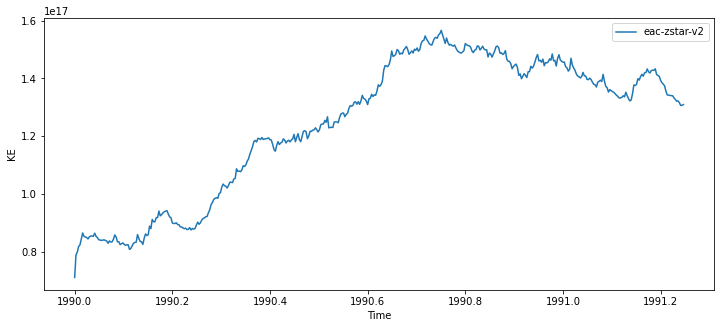

In [6]:
fig=plt.figure(figsize=(12,5))
expt = 'eac-zstar-v2'
darray = cc.querying.getvar(expt,'KE', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.sum('Layer').plot(label=expt)
plt.legend()

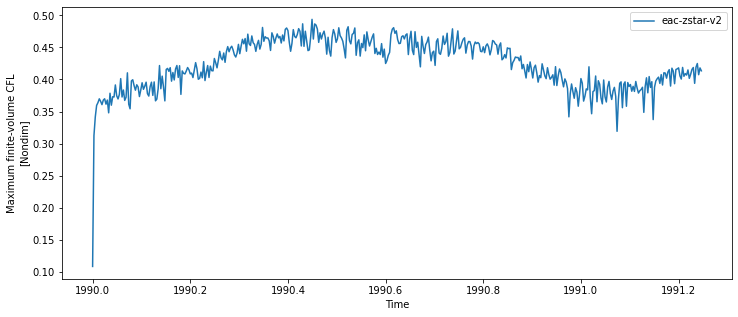

In [7]:
fig=plt.figure(figsize=(12,5))
darray = cc.querying.getvar(expt,'max_CFL_trans', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot(label=expt)
plt.legend()

In [8]:
darray = cc.querying.getvar(expt,'speed', session)

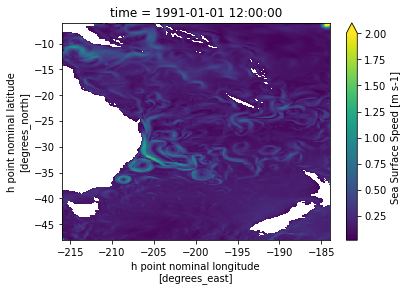

In [12]:
darray.isel(time=0).plot(vmax=2)

In [14]:
darray = cc.querying.getvar(expt,'so', session)

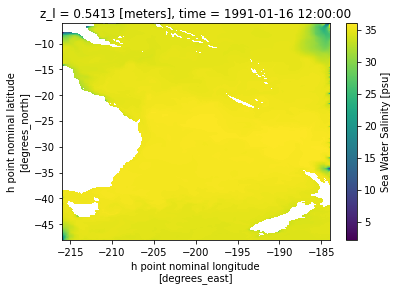

In [16]:
darray.isel(time=0).isel(z_l=0).plot()

In [59]:
xx = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/hgrid_01.nc').x.values[0,:]
yy = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/hgrid_01.nc').y.values[:,0]

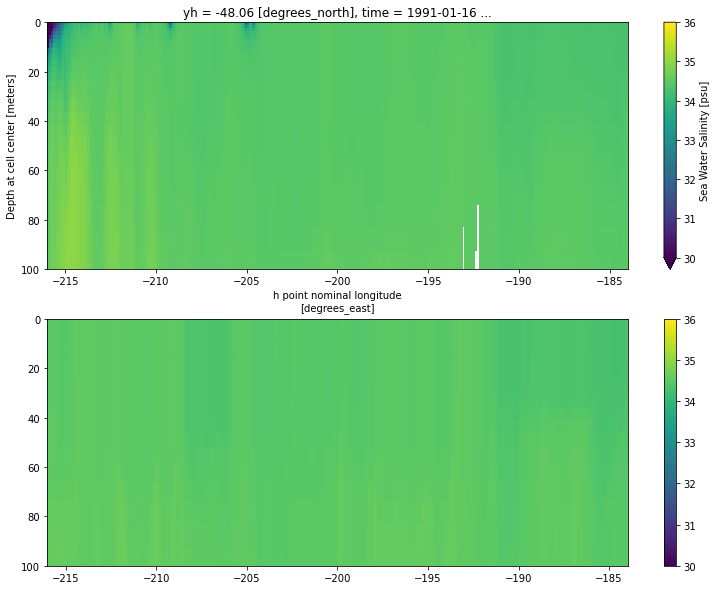

In [65]:
plt.figure(figsize=(13,10))
plt.subplot(211)
darray.isel(time=0).isel(yh=0).plot(vmin=30,vmax=36)
plt.ylim([0,100])
plt.gca().invert_yaxis()

plt.subplot(212)
boundary_data = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/forcing/forcing_obc_segment_001.nc')
salt = boundary_data.salt_segment_001.isel(time=20).isel(ny_segment_001=0).values
plt.pcolor(xx,darray.z_l,salt,vmin=30,vmax=36)
plt.ylim([0,100])
plt.gca().invert_yaxis()
plt.colorbar()

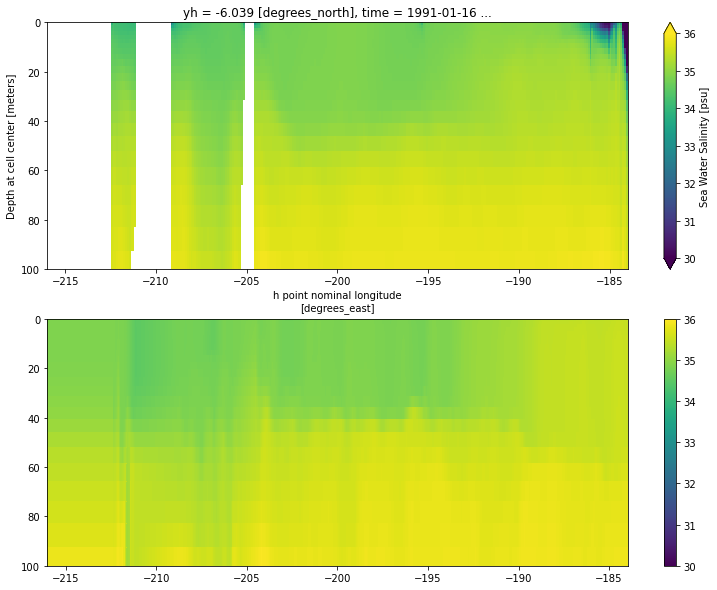

In [64]:
plt.figure(figsize=(13,10))
plt.subplot(211)
darray.isel(time=0).isel(yh=-1).plot(vmin=30,vmax=36)
plt.ylim([0,100])
plt.gca().invert_yaxis()

plt.subplot(212)
boundary_data = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/forcing/forcing_obc_segment_002.nc')
salt = boundary_data.salt_segment_002.isel(time=0).isel(ny_segment_002=0).values
plt.pcolor(xx,darray.z_l,salt,vmin=30,vmax=36)
plt.ylim([0,100])
plt.gca().invert_yaxis()
plt.colorbar()

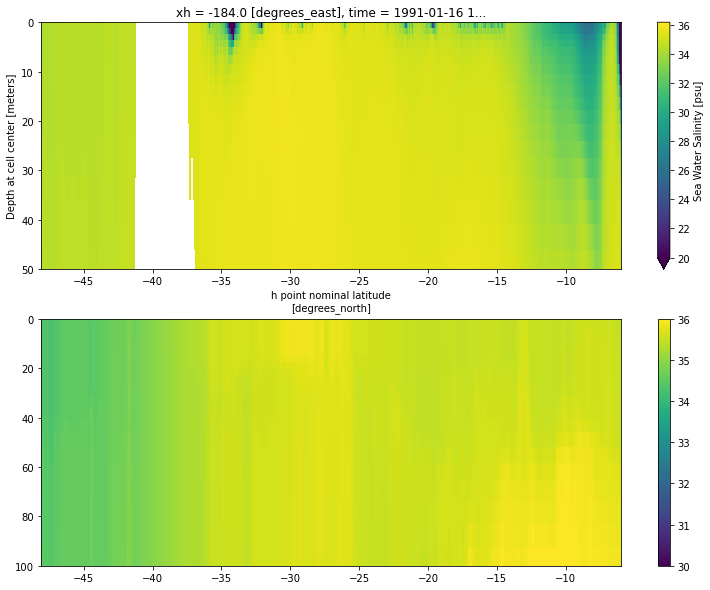

In [68]:
plt.figure(figsize=(13,10))
plt.subplot(211)
darray.isel(time=0).isel(xh=-1).plot(vmin=20)
plt.ylim([0,50])
plt.gca().invert_yaxis()


plt.subplot(212)
boundary_data = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/forcing/forcing_obc_segment_004.nc')
salt = boundary_data.salt_segment_004.isel(time=0).isel(nx_segment_004=0).values
plt.pcolor(yy,darray.z_l,salt,vmin=30,vmax=36)
plt.ylim([0,100])
plt.gca().invert_yaxis()
plt.colorbar()

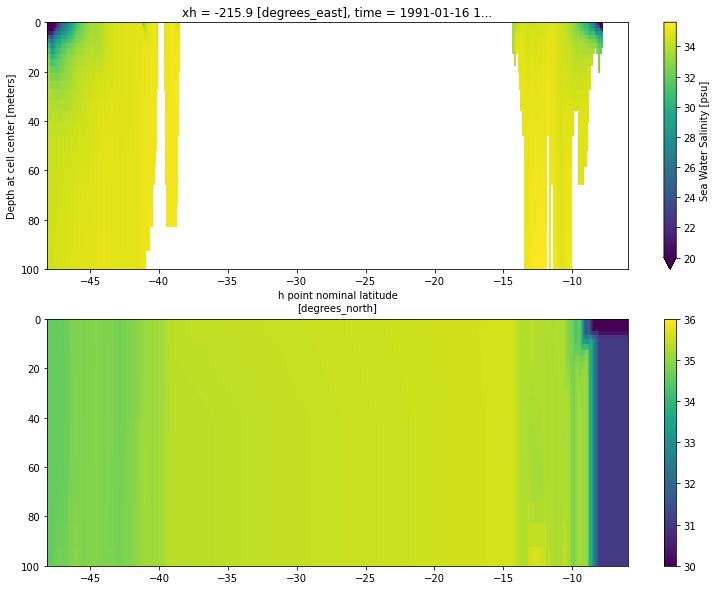

In [67]:
plt.figure(figsize=(13,10))
plt.subplot(211)
darray.isel(time=0).isel(xh=0).plot(vmin=20)
plt.ylim([0,100])
plt.gca().invert_yaxis()


plt.subplot(212)
boundary_data = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/forcing/forcing_obc_segment_003.nc')
salt = boundary_data.salt_segment_003.isel(time=0).isel(nx_segment_003=0).values
plt.pcolor(yy,darray.z_l,salt,vmin=30,vmax=36)
plt.ylim([0,100])
plt.gca().invert_yaxis()
plt.colorbar()

In [70]:
darray = cc.querying.getvar(expt,'thetao', session)

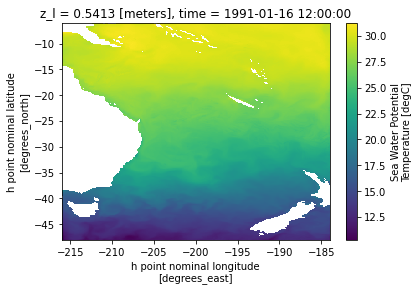

In [71]:
darray.isel(time=0).isel(z_l=0).plot()

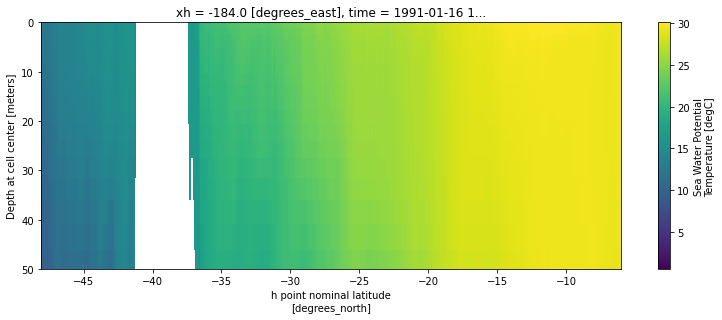

In [72]:
plt.figure(figsize=(13,10))
plt.subplot(211)
darray.isel(time=0).isel(xh=-1).plot()
plt.ylim([0,50])
plt.gca().invert_yaxis()

In [73]:
darray = cc.querying.getvar(expt,'uo', session)

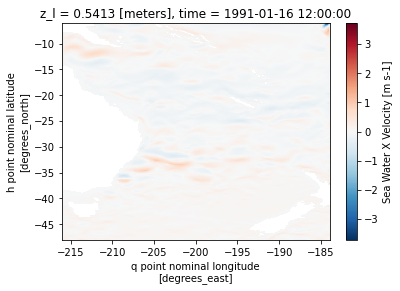

In [74]:
darray.isel(time=0).isel(z_l=0).plot()

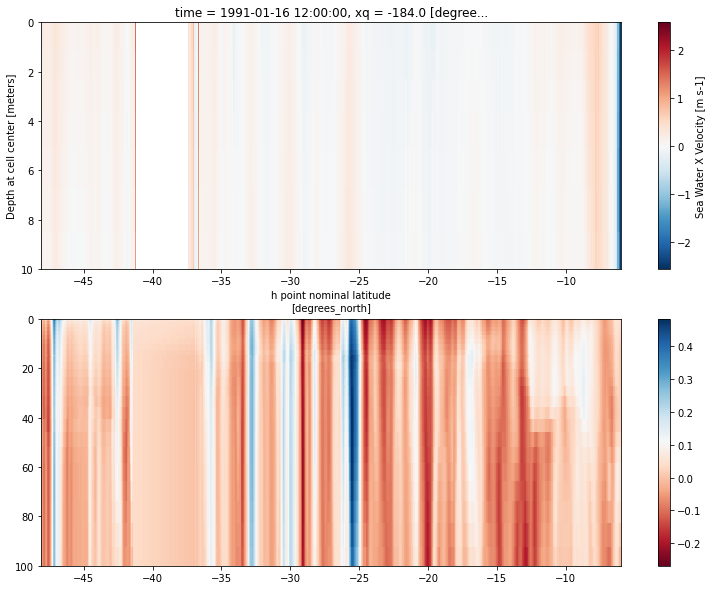

In [82]:
plt.figure(figsize=(13,10))
plt.subplot(211)
darray.isel(time=0).isel(xq=-1).plot()
plt.ylim([0,10])
plt.gca().invert_yaxis()


plt.subplot(212)
boundary_data = xr.open_dataset('/g/data/x77/ahg157/inputs/mom6/eac-01/forcing/forcing_obc_segment_004.nc')
u = boundary_data.u_segment_004.isel(time=0).isel(nx_segment_004=0).values
plt.pcolor(yy,darray.z_l,u,cmap='RdBu')
plt.ylim([0,100])
plt.gca().invert_yaxis()
plt.colorbar()